Представим, что у нас есть небольшой онлайн-кинотеатр и мы хотим, чтобы пользователи были довольны и смотрели фильмы у нас, а не на других ресурсах. Создадим небольшую матрицу рейтингов наших фильмов, на основании оценок пользователей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Названия фильмов
f = ['Терминатор', 'Робокоп', 'Рэмбо', 'Джеймс Бонд','Властелин Колец', 'Хоббит', 'Гарри Поттер', 
     'Американский Пирог', 'Мальчишник в Вегасе', 'Мстители', 'Супермен'] 

In [3]:
#Наши пользователи
u = ['Вася','Петя','Саша','Женя','Маша','Оля','Лена','Ваня','Ира']

In [4]:
#Рейтинг фильмов от пользователей. 0 - значит фильм не был просмотрен.
fu = np.array([[9,0,0,6,4,3,5,7,8,6,5],
              [0,0,0,8,10,0,8,5,6,2,0],
              [8,0,5,7,4,0,5,7,8,8,5],
              [5,2,0,4,10,0,9,5,0,0,0],
              [0,0,2,5,7,0,0,9,0,4,0],
              [2,3,0,0,0,7,9,0,5,0,3],
              [5,0,3,8,8,0,0,7,0,2,4],
              [8,7,0,6,5,4,0,8,0,10,0],
              [0,0,2,5,10,0,0,0,9,0,3]])

In [5]:
#Сделаем датафрейм из f,u и fu.
R = pd.DataFrame(fu,u,f)

In [6]:
R

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,9,0,0,6,4,3,5,7,8,6,5
Петя,0,0,0,8,10,0,8,5,6,2,0
Саша,8,0,5,7,4,0,5,7,8,8,5
Женя,5,2,0,4,10,0,9,5,0,0,0
Маша,0,0,2,5,7,0,0,9,0,4,0
Оля,2,3,0,0,0,7,9,0,5,0,3
Лена,5,0,3,8,8,0,0,7,0,2,4
Ваня,8,7,0,6,5,4,0,8,0,10,0
Ира,0,0,2,5,10,0,0,0,9,0,3


Вот теперь и встаёт вопрос, какой предложить фильм, чтобы наш пользователь хорошо провёл вечер? Немного поискав на просторах интернета, находим статью о том, что один большой онлнайн-кинотеатр **Netflix** в 2006 году объявил соревнование по разработке рекомендательной системы фильмов. За решение, которое улучшит качество рекомендаций на 10%, была объявлена награда в 1 млн долларов. В итоге в 2011 году такое решение было получено, а работало оно на основе **SVD** - Singular Value Decomposition.

### Немного линейной алгебры.
Аналитическое решение SVD состоит в том, что прямоугольную матрицу A мы можем разложить на 3 матрицы: U, Ʃ и V.

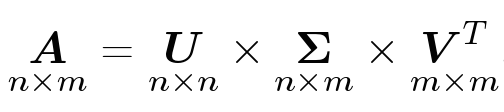

Матрицы U и V ортогональные(при умножении на транспонированную себя дают 1), а Ʃ — диагональная (хотя и не квадратная). 

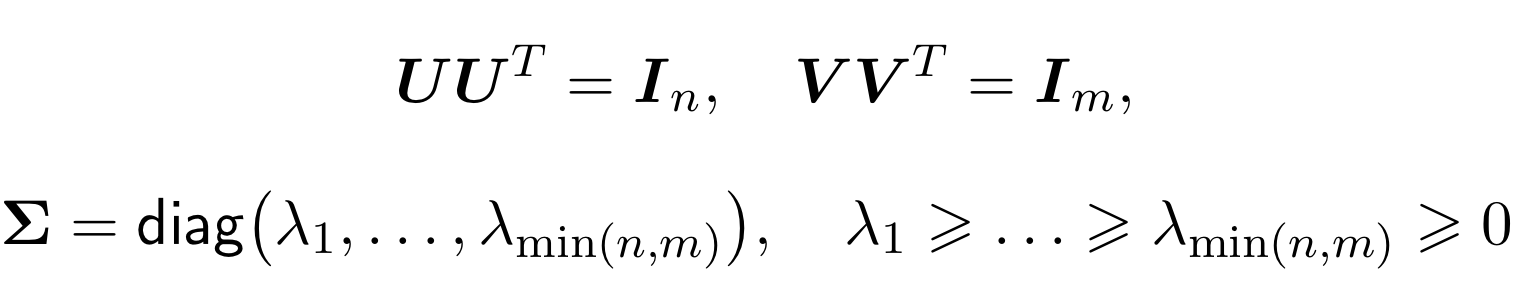

В случае разреженной матрицы, которой обычно является рейтинг фильмов, можно использовать усечённое разложение (truncated SVD), где мы оставляем только d первых чисел $\lambda$. В итоге получаем разложение матрицы A', которое хорошо приближает исходную матрицу A.

Теперь применим это к нашей рекомендательной системе. У нас есть матрица оценок R, давайте сделаем её сингулярное разложение.
Первые две матрицы перемножим, получим также матрицу $n$ x $d$, в итоге получится такое разложение. n -кол-во пользователей

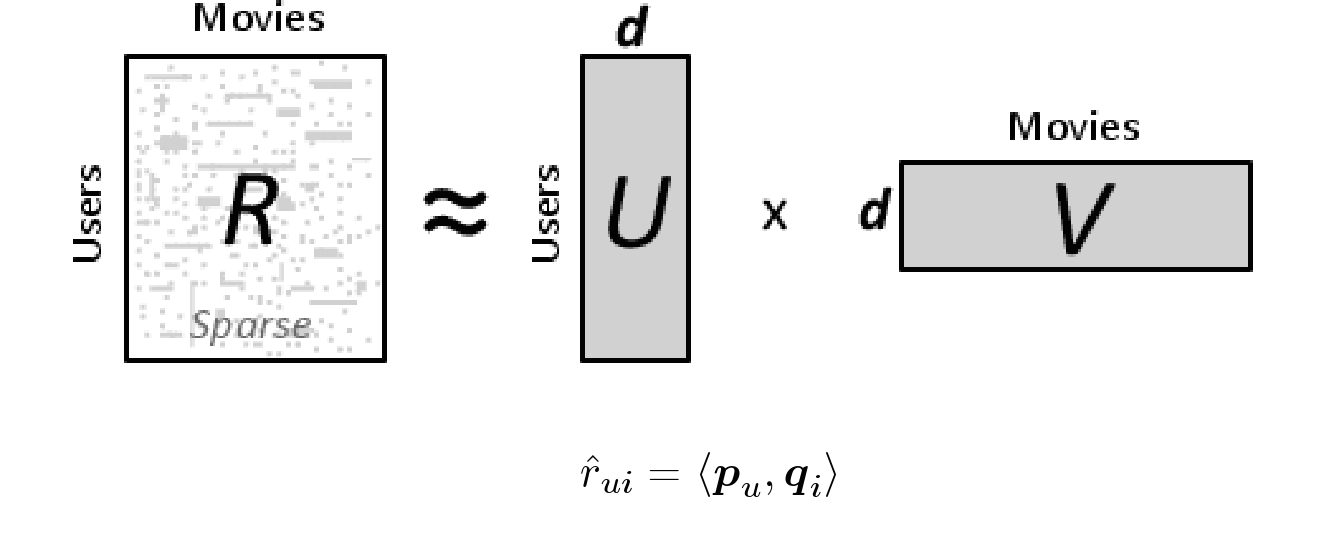

Размерность **d** в данном случае отвечает за количество скрытых свойств/интересов у наших пользователей и фильмов, $\hat r \tiny ui$ - рейтинг фильма, который мы получили перемножив матрицы **U** и **V**.

Таким образом, мы научились приближать исходную матрицу оценок матрицей, полученной на основе перемножения двух матриц, отвечающих за интересы пользователей и свойства фильмов. Но проблема в том, что матрица **R** у нас разреженная, и мы бы хотели бы как раз заполнить пустые (нулевые) элементы оценками пользователей.


Как же это сделать? Для этого нам нужно приблизить уже имеющиеся оценки числами, полученными в результате перемножения матриц $U$ и $V$. Тогда мы получим и оценки для нулей нашей исходной матрицы, т.е. нужно минимизировать такую функцию:

$$\large \frac{1}{n}\Sigma_{ui} (r {\tiny ui}-\hat r {\tiny ui})^{2} \to min,$$ где суммирование идёт по ненулевым индексам $u,i$ нашей исходной матрицы оценок, а $n$ - количество оценок в матрице.

Так это же задача регрессии с квадратичной функций потерь **MSE**. **MSE** выбрана по двум причинам: историческая, Netflix предложили метрику **RMSE** и она лучше оптимизируется градиентным спуском.

Функция потерь есть, метод оптимизации выбран, что забыли? Регуляризатор! Воспользуемся $L{\tiny 2}$-регуляризацией: 
$\large \lambda(\Sigma_{u}p {\tiny u}^{2} + \Sigma_{i}q {\tiny i}^{2})$
Осталось посчитать градиенты для реализации поиска минимума **MSE**. Воспользуемся стохастическим градиентным спуском, поэтому будем считать градиенты на одном объекте $\large r {\tiny ui}$ из матрицы оценок. В итоге получаем такие правила обновления элементов наших матриц **U** и **V**.

$\large 
{p_{u,j}=p_{u,j} + \large \gamma (r_{ui}-\hat r_{ui}) q_{i,j} - \lambda p_{u,j}}$


$\large {q_{i,j}=q_{i,j} + \large \gamma (r_{ui}-\hat r_{ui}) p_{u,j} - \lambda q_{i,j}}$

Индексы $u,i$ - номера пользователя и фильма в наших матрицах **U** (номер строки) и **V** (номер столбца), $j$ - $j$-ая компонента векторов $\large p_{u}$ и $\large q_{i}$.

Ну что же, теперь воспользуемся Питоном и сделаем рекомендации для наших пользователей!

In [7]:
def SVD(R,d,step,lambda_reg,n_iters):
    #инициализуем наши матрицы для разложения
    U = np.zeros((R.shape[0],d))
    V = np.zeros((d,R.shape[1]))
    #начальные элементы матрица U и V будут средним рейтингом по ненулевым оценкам
    mu = R.sum()/(R!=0).sum()
    non_zero = (R!=0).sum()
    U = U + mu
    V = V + mu
    # Создадим списки, где будут индексы нулевых и ненулевых элементов матрицы R
    indx=[]
    zero_indx = []
    # Инициализируем MSE в начале и будем отслеживать в процессе обучения
    MSE_start = 0
    MSE=[]
    # Найдём индексы нулевых и ненулевых элементов
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R[i][j]>0:
                indx.append([i,j])
                MSE_start+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2) / non_zero
            else:
                zero_indx.append([i,j])
    # Сделаем градиентный спуск            
    for n in range(n_iters):
        choice = np.random.randint(0,len(indx))
        ij = indx[choice]
        for k in range(0,d):
            U[ij[0],k] = U[ij[0],k] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * V[k,ij[1]] - 
                                              lambda_reg * U[ij[0],k])
            V[k,ij[1]] = V[k,ij[1]] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * U[ij[0],k] - 
                                              lambda_reg * V[k,ij[1]])
            
        L=0
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i,j]>0:
                    L+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2)/non_zero
        MSE.append(L)    
    return U,V, MSE_start, MSE

In [8]:
A,B,M_1,M_end = SVD(R.values,2,0.01,0.1,3000)

In [9]:
R.values

array([[ 9,  0,  0,  6,  4,  3,  5,  7,  8,  6,  5],
       [ 0,  0,  0,  8, 10,  0,  8,  5,  6,  2,  0],
       [ 8,  0,  5,  7,  4,  0,  5,  7,  8,  8,  5],
       [ 5,  2,  0,  4, 10,  0,  9,  5,  0,  0,  0],
       [ 0,  0,  2,  5,  7,  0,  0,  9,  0,  4,  0],
       [ 2,  3,  0,  0,  0,  7,  9,  0,  5,  0,  3],
       [ 5,  0,  3,  8,  8,  0,  0,  7,  0,  2,  4],
       [ 8,  7,  0,  6,  5,  4,  0,  8,  0, 10,  0],
       [ 0,  0,  2,  5, 10,  0,  0,  0,  9,  0,  3]])

In [10]:
A@B

array([[6.10808685, 4.96216399, 3.5241459 , 4.92087482, 6.11924867,
        5.51349703, 6.9862014 , 6.45737711, 6.50138999, 4.88180031,
        3.8613061 ],
       [6.33466397, 4.15964915, 1.93916737, 6.46373026, 7.78434624,
        4.81729946, 8.90088822, 7.37225673, 7.8607086 , 5.59671305,
        4.08556205],
       [7.26746838, 6.58740437, 5.38146764, 4.91267308, 6.28463011,
        7.18391064, 7.16553489, 7.21527282, 6.96092558, 5.43866059,
        4.53810324],
       [5.19322579, 2.8788914 , 0.66591583, 6.03150894, 7.15605019,
        3.46427529, 8.18848014, 6.40750051, 7.04637104, 4.87568737,
        3.39301486],
       [6.27066687, 4.72157761, 2.96987073, 5.56569098, 6.82534557,
        5.32001989, 7.79750454, 6.88435439, 7.0968012 , 5.21338291,
        3.99468793],
       [5.44578562, 4.09978514, 2.57800005, 4.83449477, 5.92850105,
        4.61956458, 6.77292795, 5.97921578, 6.16402473, 4.52795528,
        3.46925912],
       [6.14190307, 4.34502234, 2.4226505 , 5.83692139, 7.

In [11]:
B

array([[4.78394616, 5.32375962, 5.25971089, 1.87230844, 2.69756526,
        5.63047738, 3.05981025, 4.07362989, 3.46299355, 3.04579154,
        2.90619512],
       [4.2905985 , 3.5418087 , 2.5731825 , 3.37921431, 4.21657879,
        3.92420247, 4.81318928, 4.49751369, 4.50322479, 3.39881247,
        2.70774536]])

In [12]:
r_cap = np.zeros((R.shape[0],R.shape[1]))
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        r_cap[i,j]=np.dot(A[i,:],B[:,j])

In [13]:
R

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,9,0,0,6,4,3,5,7,8,6,5
Петя,0,0,0,8,10,0,8,5,6,2,0
Саша,8,0,5,7,4,0,5,7,8,8,5
Женя,5,2,0,4,10,0,9,5,0,0,0
Маша,0,0,2,5,7,0,0,9,0,4,0
Оля,2,3,0,0,0,7,9,0,5,0,3
Лена,5,0,3,8,8,0,0,7,0,2,4
Ваня,8,7,0,6,5,4,0,8,0,10,0
Ира,0,0,2,5,10,0,0,0,9,0,3


In [14]:
R_cap = pd.DataFrame(r_cap,u,f)

In [15]:
R_cap

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,6.108087,4.962164,3.524146,4.920875,6.119249,5.513497,6.986201,6.457377,6.501390,4.881800,3.861306
Петя,6.334664,4.159649,1.939167,6.463730,7.784346,4.817299,8.900888,7.372257,7.860709,5.596713,4.085562
Саша,7.267468,6.587404,5.381468,4.912673,6.284630,7.183911,7.165535,7.215273,6.960926,5.438661,4.538103
Женя,5.193226,2.878891,0.665916,6.031509,7.156050,3.464275,8.188480,6.407501,7.046371,4.875687,3.393015
Маша,6.270667,4.721578,2.969871,5.565691,6.825346,5.320020,7.797505,6.884354,7.096801,5.213383,3.994688
Оля,5.445786,4.099785,2.578000,4.834495,5.928501,4.619565,6.772928,5.979216,6.164025,4.527955,3.469259
Лена,6.141903,4.345022,2.422651,5.836921,7.092755,4.955511,8.106572,6.934384,7.267961,5.257617,3.935622
Ваня,8.095205,6.581801,4.679887,6.514432,8.102249,7.312034,9.250072,8.554489,8.610435,6.467099,5.117052
Ира,6.018525,3.900729,1.753130,6.211921,7.470677,4.530026,8.542809,7.039470,7.526583,5.345175,3.885882


In [16]:
print ('Start MSE:',M_1,'Finish MSE:',M_end[-1])

Start MSE: 4065.7950666666675 Finish MSE: 3.216430324569199


In [17]:
print ('Start RMSE',np.sqrt(M_1),'Finish RMSE',np.sqrt(M_end[-1]))

Start RMSE 63.76358731020917 Finish RMSE 1.7934409175016608


In [18]:
n = (R.values != 0).sum()

In [19]:
L=0
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R.values[i,j]>0:
            L+=((R.values[i,j]-R_cap.values[i,j]) ** 2)/n

In [20]:
L

3.216430324569199

В итоге получили матрицу оценок с помощью SGD. Как видно, MSE сильно упал. Можно поиграться с параметрами, чтобы настроить качество. Как итог, выбираем фильмы с наибольшей оценкой и рекомендуем их пользователям! :) 

Как подбирать d?

есть хорошая библиотека Surprise, где можно делать рекомендации проще, быстрее и различными способами.
Оставлю ссылку для ознакомления http://surpriselib.com/

#### Домашнее задание 1.  Гибкий дедлайн 4 октября. Жесткий дедлайн  11 октября (-1 балл). 

    на этих же игрушечных данных:
    
        1. Разобраться и применить truncated SVD из sklearn.decomposition
        2. Разобраться и применить SVD из surprise.
        3. Разобраться и применить svds из scipy.sparse
        
    Сравнить результаты. Какие различия у этих алгоритмов? Как изменилась метрика? Почему? 

# Пункт 1

In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
for n_comp in range(5, 10):
    svd_trunc = TruncatedSVD(n_components=n_comp, n_iter=10, random_state=42)
    svd_trunc.fit(R.values)
    print(svd_trunc.singular_values_)
    R_transformed = svd_trunc.transform(R.values)
    U = R_transformed / svd_trunc.singular_values_
    Sigma = np.diag(svd_trunc.singular_values_)
    VT = svd_trunc.components_
    mse_trunc = np.sum((R.values - U @ Sigma @ VT)[R.values != 0]**2) / np.sum(R.values != 0)
    rmse_trunc = np.sqrt(np.sum((R.values - U @ Sigma @ VT)[R.values != 0]**2) / np.sum(R.values != 0))
    print("n_components = ", n_comp, "\nmse = ", mse_trunc, "\nrmse = ", rmse_trunc, '\n\n')

[40.65732704 15.97128223 15.06988473 11.94761471  7.69986789]
n_components =  5 
mse =  0.8286738976390197 
rmse =  0.9103152737590531 


[40.65732704 15.97128223 15.06988473 11.94761471  7.69986789  6.24031066]
n_components =  6 
mse =  0.41762290836592386 
rmse =  0.646237501516218 


[40.65732704 15.97128223 15.06988473 11.94761471  7.69986789  6.24031066
  4.98555437]
n_components =  7 
mse =  0.21116516054967727 
rmse =  0.4595271053481799 


[40.65732704 15.97128223 15.06988473 11.94761471  7.69986789  6.24031066
  4.98555437  3.72953874]
n_components =  8 
mse =  0.11160800857849648 
rmse =  0.3340778480810969 


[40.65732704 15.97128223 15.06988473 11.94761471  7.69986789  6.24031066
  4.98555437  3.72953874  2.65675076]
n_components =  9 
mse =  1.3351470820865625e-29 
rmse =  3.653966450429673e-15 




In [23]:
svd_trunc = TruncatedSVD(n_components=7, n_iter=10, random_state=42)
svd_trunc.fit(R.values)

TruncatedSVD(n_components=7, n_iter=10, random_state=42)

In [24]:
print(svd_trunc.singular_values_)

[40.65732704 15.97128223 15.06988473 11.94761471  7.69986789  6.24031066
  4.98555437]


In [25]:
R_transformed = svd_trunc.transform(R.values)
U = R_transformed / svd_trunc.singular_values_
Sigma = np.diag(svd_trunc.singular_values_)
VT = svd_trunc.components_

In [26]:
mse_trunc = np.sum((R.values - U @ Sigma @ VT)[R.values != 0]**2) / np.sum(R.values != 0)
rmse_trunc = np.sqrt(np.sum((R.values - U @ Sigma @ VT)[R.values != 0]**2) / np.sum(R.values != 0))
print("mse = ", mse_trunc, "\nrmse = ", rmse_trunc)

mse =  0.21116516054967727 
rmse =  0.4595271053481799


In [27]:
mse_trunc = np.sum((R.values - U @ VT)[R.values != 0]**2) / np.sum(R.values != 0)
rmse_trunc = np.sqrt(np.sum((R.values - U @ VT)[R.values != 0]**2) / np.sum(R.values != 0))
print("Варинт без умножения на сигма матрицу:")
print("mse = ", mse_trunc, "\nrmse = ", rmse_trunc)

Варинт без умножения на сигма матрицу:
mse =  37.040680687321405 
rmse =  6.0861055435575055


# Пункт 2

In [28]:
from surprise import SVD
from surprise.dataset import DatasetAutoFolds 
from surprise import Reader

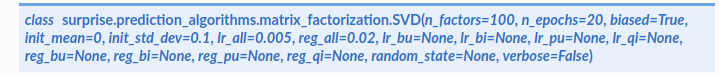

In [29]:
R_sur = R.stack().reset_index()
R_sur.columns = ['ID_film', 'ID_user', 'rating']
reader = Reader(rating_scale=(min(R.min()), max(R.max())))
trainset = DatasetAutoFolds(reader=reader, df=R_sur[["ID_user", "ID_film", "rating"]]).build_full_trainset() 
svd_sur = SVD(biased = False) 
svd_sur.fit(trainset) 

In [30]:
svd_sur.__dict__

{'n_factors': 100,
 'n_epochs': 20,
 'biased': False,
 'init_mean': 0,
 'init_std_dev': 0.1,
 'lr_bu': 0.005,
 'lr_bi': 0.005,
 'lr_pu': 0.005,
 'lr_qi': 0.005,
 'reg_bu': 0.02,
 'reg_bi': 0.02,
 'reg_pu': 0.02,
 'reg_qi': 0.02,
 'random_state': None,
 'verbose': False,
 'bsl_options': {},
 'sim_options': {'user_based': True},
 'trainset': <surprise.trainset.Trainset at 0x7fa492ed2400>,
 'bu': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'bi': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'pu': array([[ 0.34193618, -0.13623605,  0.10425151, ..., -0.12347696,
          0.06025818,  0.13716648],
        [ 0.01601931, -0.15721592, -0.03494484, ..., -0.04265632,
          0.13192151,  0.12282295],
        [ 0.0149595 ,  0.04261493,  0.03279102, ..., -0.17337844,
         -0.04759529,  0.06906173],
        ...,
        [ 0.41958501, -0.0655739 ,  0.21766731, ..., -0.06328551,
         -0.19014423,  0.37441177],
        [-0.15568789, -0.1883232 , -0.17916384, ..., -0.11915734,
     

In [31]:
R_sur_cap = svd_sur.qi @ svd_sur.pu.T
mse_sur = np.sum((R.values - R_sur_cap)[R.values != 0]**2) / np.sum(R.values != 0)
rmse_sur = np.sqrt(np.sum((R.values - R_sur_cap)[R.values != 0]**2) / np.sum(R.values != 0))
print("mse = ", mse_sur, "\nrmse = ", rmse_sur)

mse =  3.9191221956721876 
rmse =  1.9796772958419733


# Пункт 3

In [32]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [33]:
u, s, vt = svds(np.array(R.values, dtype=float), k = 7)

In [34]:
mse_svds = np.sum((R.values - u @ np.diag(s) @ vt)[R.values != 0]**2) / np.sum(R.values != 0)
rmse_svds = np.sqrt(np.sum((R.values - u @ np.diag(s) @ vt)[R.values != 0]**2) / np.sum(R.values != 0))
print("mse = ", mse_svds, "\nrmse = ", rmse_svds)

mse =  0.21116516054967743 
rmse =  0.45952710534818014


In [35]:
mse_svds = np.sum((R.values - u @ vt)[R.values != 0]**2) / np.sum(R.values != 0)
rmse_svds = np.sqrt(np.sum((R.values - u @ vt)[R.values != 0]**2) / np.sum(R.values != 0))
print("Вариант без умножения на сигма матрицу:")
print("mse = ", mse_svds, "\nrmse = ", rmse_svds)

Вариант без умножения на сигма матрицу:
mse =  37.040680687321405 
rmse =  6.0861055435575055


# Выводы
Подходы 1 и 3 имеют одинаковую идею с урезанием количества собственных чисел и векторов, соответственно, приближают исходную матрицу матрицей меньшего ранга.

Подход 2 выражается формулой 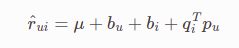
Соответственно, минимизируется функционал 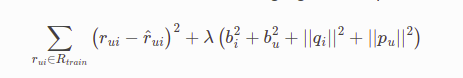

В итоге подход 2 имеет mse/rmse ниже, если в подходах 1 и 3 $\hat R $=$ U V$ без матрицы $\Sigma$. В случае же использования полноценной формулы, mse/rmse подходов 1 и 3 ниже, а подход 2 требует более внимательного подбора параметров.

Истинная обобщающая способность данных подходов остаётся под вопросом :/